In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.color import rgb2gray

In [2]:
from tools.load import load
from tools.display import disp
from tools.processor import proc
import tools.fitness as ftn
import tools.dna as dna
from tools.workspace import ws

In [3]:
# program paratemers. edit as you wish.
# TODO: add options on what parameters can be used
keyword = 'gioconda-01' 
imagekey = 'gioconda'
popSize = 10

# from here on you don't need to change anything

# load and show image
data = load.image(imagekey)
controlImg = rgb2gray(data)

# load workspace
evolution = ws.evolution(keyword)

# initialize reconstruction
(m,n) = controlImg.shape

if len(evolution) == 0:
    DNA = np.zeros((m,n))
else:
    DNA = evolution[-1]
    
bestFitness = ftn.fitness(controlImg,DNA)

Loading assets/gioconda.png

File 'workspace/gioconda-01.pkl' exist. Workspace will be loaded.

Image size: (350,350)
Evolution length: 245



In [4]:
# resume GA processing
for k in range(100):
    
    # initialize a population
    randomPop = dna.randomPop(popSize,m,n)
    
    # breed a new population as a result of merging previous and current random population
    population = dna.merge(DNA,randomPop,m,n)
    
    # order by fitness; fitnesses[0] holds the highest fitness.
    (fitnesses, population) = ftn.orderByFitness(population,controlImg)
    
    # if better fitness found
    if bestFitness > fitnesses[0]:
        
        # retrieve the best fitness
        bestFitness = fitnesses[0]
        DNA = population[:,:,0]
        
        # recolect history of DNA evolution
        evolution.append(DNA)


/Users/gerardomijares/python_lab/monalisa-reconstruction/tools/triangles.py:28: RuntimeWarning: divide by zero encountered in long_scalars
  invSlope2 = ( v2[1] - v1[1] ) / ( v2[0] - v1[0] ) # notice this is an inverse slope and thus x components go in the numerator
/Users/gerardomijares/python_lab/monalisa-reconstruction/tools/triangles.py:63: RuntimeWarning: divide by zero encountered in long_scalars
  invSlope1 = ( v3[1] - v2[1] ) / ( v3[0] - v2[0] ) # notice this is an inverse slope and thus x components go in the numerator


<IPython.core.display.Javascript object>


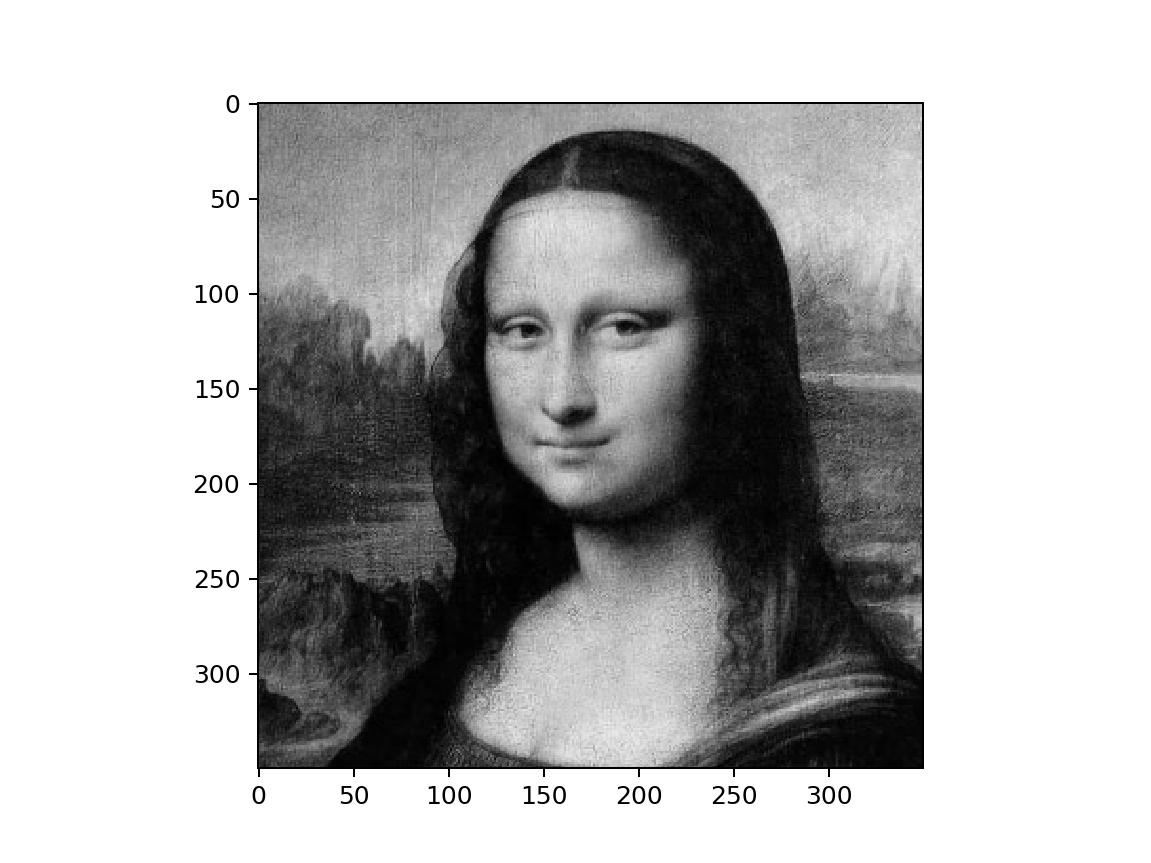

<IPython.core.display.Javascript object>


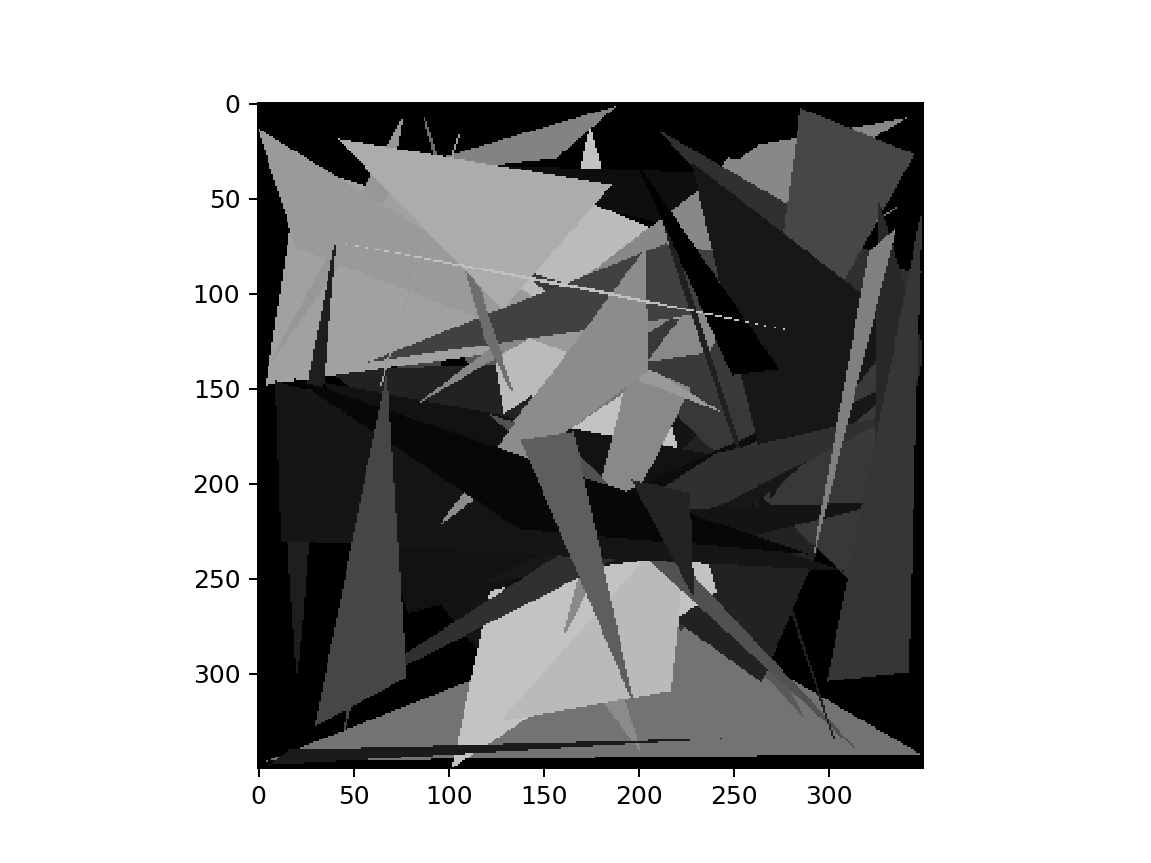

In [5]:
%matplotlib nbagg

# show original in black and white
disp.matrix(controlImg)

# initialize variables
myimages = []
fig = plt.figure()

# start rendering
for DNA in evolution:
    myimages.append(
        [disp.matrix(DNA, show=False)]
    )

# animate
my_anim = animation.ArtistAnimation(fig, myimages, interval=5, blit=True, repeat_delay=1000) 

# uncomment if you want to save a recording
# my_anim.save('recordings/' + keywork + '.mp4') 

plt.show()